### ML- CUSTOMER CHURN FOR A TELECOMMUNICATION COMPANY

##### Author  : Adeyemi Bolaji

### Dataset Description

Each row represents a customer, each column contains customer’s attributes described below;
* Gender - If the customer is a male or a female
* Senior Citizen - If the customer is a senior citizen or not (1, 0)
* Partner - If the customer has a partner or not (Yes, No)
* Dependents - If the customer has dependents or not (Yes, No)
* Tenure - Number of months the customer has stayed with the company
* PhoneService - If the customer has a phone service or not (Yes, No)
* MultipleLines - If the customer has multiple lines or not (Yes, No, No phone service)
* InternetService - Customer’s internet service provider (DSL, Fiber optic, No)
* OnlineSecurity - Whether the customer has online security or not (Yes, No, No internet service)
* Contract - Types contract the customer uses (Month-to-month, One year, Two year)
etc.

The raw data contains 7043 rows (customers) and 21 columns (features).

The “Churn” column is our target.

#### Data Source - Kaggle

### Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

import matplotlib.font_manager

import random
random.seed(42)


In [2]:
cc = pd.read_csv('C:\\Users\\bolaj\\Desktop\\Desk\\Data\\Telco-Customer-Churn.csv')

### Data Inspection

In [3]:
cc.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [4]:
cc.OnlineBackup.value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [5]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
cc.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
cc.sample(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2212,8076-FEZKJ,Male,0,No,No,10,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.50,225.85,No
3301,2636-ALXXZ,Female,1,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,69.60,69.6,Yes
1712,6303-KFWSL,Female,0,No,No,29,Yes,Yes,DSL,No,...,No,No,No,No,One year,Yes,Electronic check,55.25,1620.2,No


In [8]:
cc.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
cc.InternetService.unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [10]:
cc.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [11]:
cc.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [12]:
cc.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [13]:
#Changing Total charges from object to numbers
cc.TotalCharges = pd.to_numeric(cc.TotalCharges, errors='coerce')
cc.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [14]:
cc.customerID.nunique()

7043

In [15]:
cc.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
cc['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [17]:
cc[cc['tenure']==72]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
28,5248-YGIJN,Male,0,Yes,No,72,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),90.25,6369.45,No
35,6234-RAAPL,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,No,Yes,Yes,No,Two year,No,Bank transfer (automatic),99.90,7251.70,No
59,5954-BDFSG,Female,0,No,No,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),107.50,7853.70,No
62,0526-SXDJP,Male,0,Yes,No,72,No,No phone service,DSL,Yes,...,Yes,No,No,No,Two year,No,Bank transfer (automatic),42.10,2962.00,No
94,9848-JQJTX,Male,0,No,No,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),100.90,7459.05,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6982,8468-FZTOE,Female,0,Yes,Yes,72,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,Two year,Yes,Electronic check,74.35,5237.40,No
7007,2274-XUATA,Male,1,Yes,No,72,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),63.10,4685.55,No
7022,7203-OYKCT,Male,0,No,No,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Electronic check,104.95,7544.30,No
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No


In [18]:
cc['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

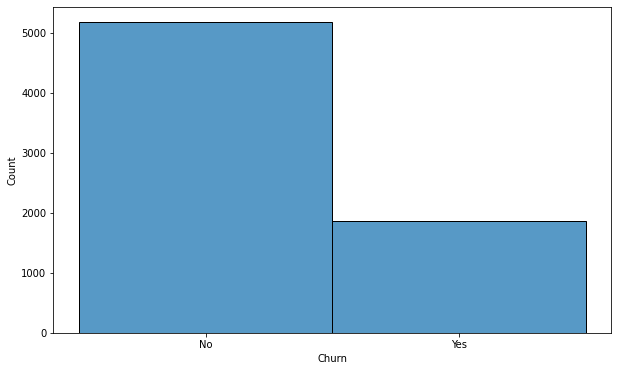

In [19]:
plt.figure(figsize=(10, 6))

sns.histplot(cc , x='Churn',bins=70);

The customer churn data indicates that 1869 out of 7043 customers (about 26.5%) have churned, or left the company. This suggests that there may be issues with customer retention for the company, and it may be beneficial to investigate the reasons for the high churn rate and implement strategies to reduce it. However the churned customers are not too well represented. 

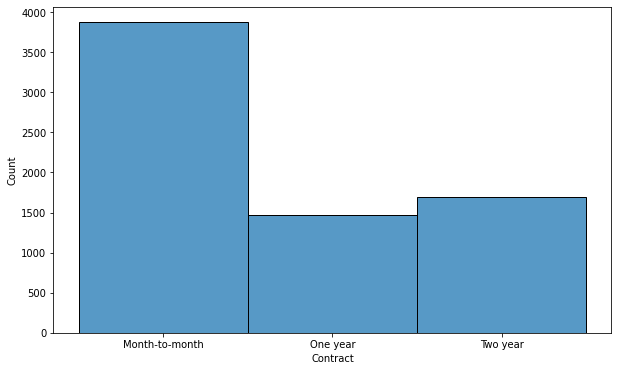

In [20]:
plt.figure(figsize=(10, 6))

sns.histplot(cc , x='Contract',bins=70);

<AxesSubplot: xlabel='TotalCharges', ylabel='Count'>

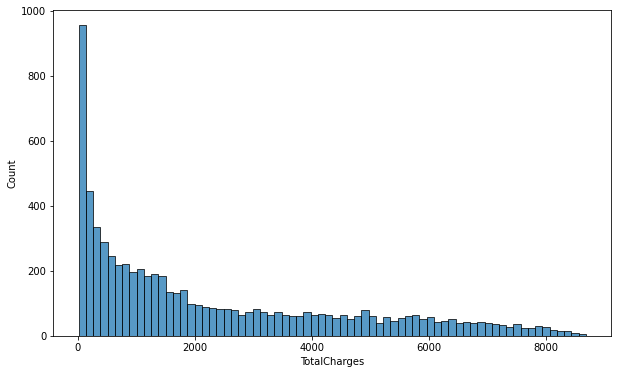

In [21]:
plt.figure(figsize=(10, 6))

sns.histplot(cc , x='TotalCharges',bins=70)

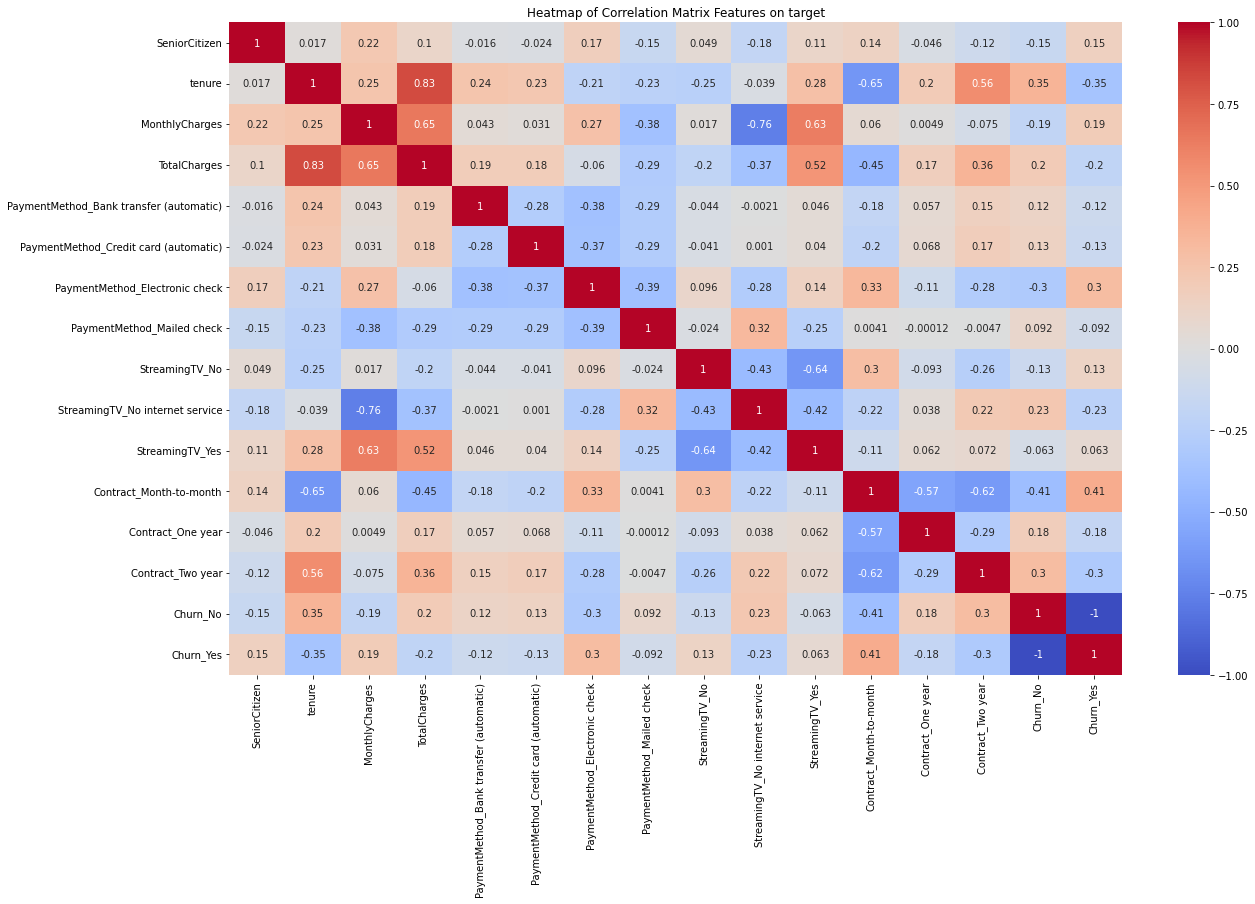

In [22]:
# Convert categorical features into dummy variables
data_dummies = pd.get_dummies(cc, columns=['PaymentMethod', 'StreamingTV','Contract','Churn'])

plt.figure(figsize=(20, 12))

# Create a heatmap of the correlation matrix
sns.heatmap(data_dummies.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix Features on target')
plt.show()

In [23]:
cc.loc[cc['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


### Dealing with the null Value

Analysis of the heat map above showed that Two year and One year contract types have a positive relationship with Total Charges , So in dealing with the null value, it will be ideal to consider the contact types in filling the null values in Total charges.

In [24]:
#Contract type is a major factor that determines each customers Total Charge
cc['TotalCharges'] =(cc
                .groupby(['Contract','gender'],sort=False)['TotalCharges']
                .apply(lambda x : x.fillna(round(x.mean(),1)))
                         )

In [25]:
cc[cc['TotalCharges'].isnull()].sample(frac=0.25)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


### Data Visualisation

* Checking the relationship between the Contract Types and Churn using count plot
* Checking the Monthly charges relationship with Churn using Boxplot and Violin plot

### Discoveries
##### Comparing Monthly contract to Others (Yearly and Bi-yearly)
* Month to Month Groups had higher rate of churn ,because customers committment or rentention is not guaranteed compare to Yearly contract. 


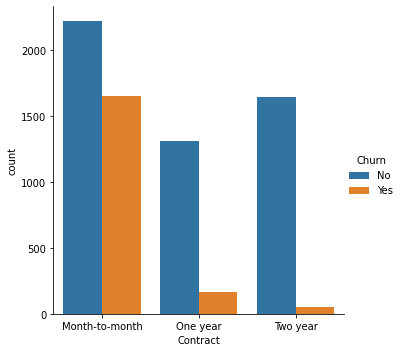

In [26]:
sns.catplot(data=cc, x="Contract", hue="Churn" , kind='count')

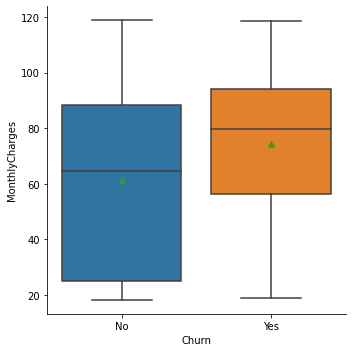

In [27]:
sns.catplot(data=cc,x= 'Churn' , y="MonthlyCharges" , kind='box', showmeans= True)

### Observations

The boxplot shows the median, quartiles and outliers of total charges for customers who have churned (labeled as "Yes") and those who have not (labeled as "No"). From this plot, we can see that the median total charge for customers who have churned is higher than for those who have not, which suggests that higher Montly charges could be a contributing factor to the churn.

### recommendation
Customers who have higher monthly charges tend to be more profitable, and are more likely to churn. By identifying these customers and implementing retention strategies such as temporary promotional discounts for consistent subscribers, the company can have a significant impact on reducing the churn rate.

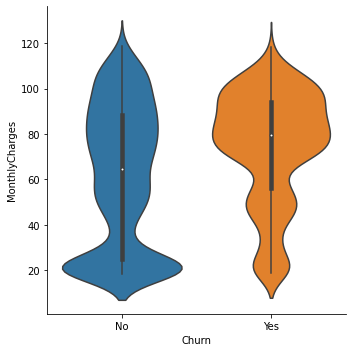

In [28]:
sns.catplot(data=cc,x= 'Churn' , y="MonthlyCharges" , kind='violin', showmeans= True)

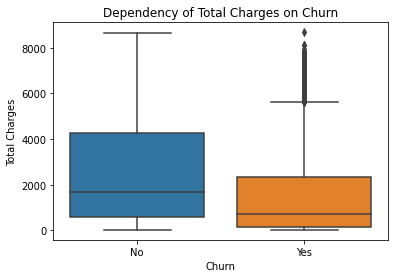

In [29]:
# Create box plot
sns.boxplot(x='Churn', y='TotalCharges', data=cc)

# Add labels and title
plt.xlabel("Churn")
plt.ylabel("Total Charges")
plt.title("Dependency of Total Charges on Churn")

# Show plot
plt.show()

From the boxplot above , the median total Charges of churned customer is lower to those who have not , therefore there is need for further investigation as total charges might not be entirely contribution to churn.
However , there some outliers in the total charges , this could be as a result of extra services recieved. 

In [30]:
cc[cc['TotalCharges']>=5800]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No
17,9959-WOFKT,Male,0,No,Yes,71,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Two year,No,Bank transfer (automatic),106.70,7382.25,No
28,5248-YGIJN,Male,0,Yes,No,72,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),90.25,6369.45,No
30,3841-NFECX,Female,1,Yes,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,No,No,Two year,Yes,Credit card (automatic),96.35,6766.95,No
35,6234-RAAPL,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,No,Yes,Yes,No,Two year,No,Bank transfer (automatic),99.90,7251.70,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7022,7203-OYKCT,Male,0,No,No,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Electronic check,104.95,7544.30,No
7023,1035-IPQPU,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.40,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No


The outlier subset confirmed the assumptions stated above , that the customers paying more than 5800 got more services from the company which led to higher charges compared to others.

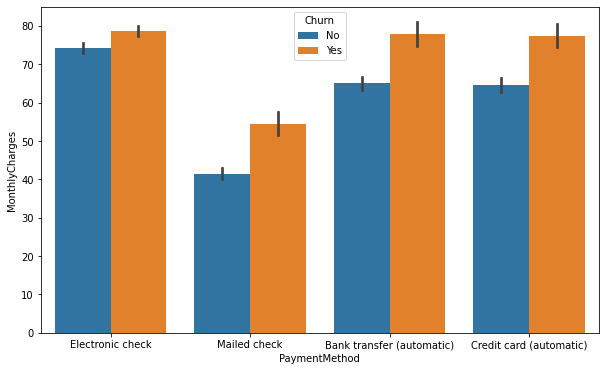

In [32]:
plt.figure(figsize=(10,6))
sns.barplot(x='PaymentMethod', y='MonthlyCharges', hue='Churn', data=cc);

### Inference

Can be assumed that customers with the Electronic check payment method are likely to churn. 
Does this mean that electronic check is expensive , which tends to increase their monthly charges ?

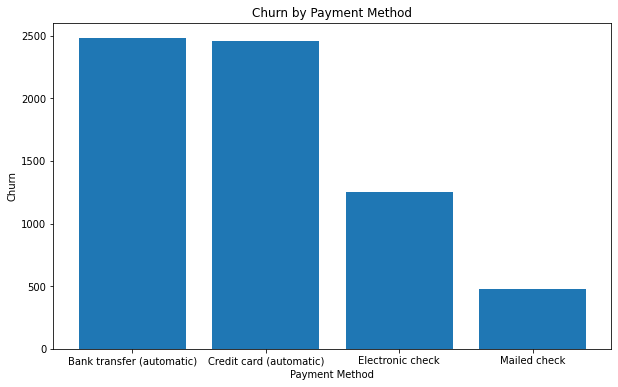

In [33]:
plt.figure(figsize=(10, 6))

payment_method_total = cc.groupby('PaymentMethod').TotalCharges.median()

# Create a bar chart
plt.bar(payment_method_total.index, payment_method_total.values)
plt.xlabel('Payment Method')
plt.ylabel('Churn')
plt.title('Churn by Payment Method')
plt.show()

The plot above shows the median of total charges of customers ,by payment method. And it can be deduced that customers usig Bank Transfer and creadit cards have more higher median total charges, this can be a leading to solving the churn rate by advicing customers to use more of Mail check or providing incentives on a total charges cut off point from 1500 above. i.e When customers spend from 1500 - 2500 they get 3% off their charges.

Note: I used median to reduce the effect of outliers 

Stacked barchart code gotten from kaggle search , but modified into a function

In [34]:
def stack_plot(cc,id_vars,value_vars,x,y,z,a,b):
    cc = pd.melt(cc, id_vars, value_vars)
    df3 = cc.groupby([x,y]).count().unstack()
    df3 = df3*100/len(cc)
    colors = ['#4D3425','#E4512B']
    ax = df3.loc[:,z].plot.bar(stacked=True, color=colors,
                                          figsize=(8,6),rot = 0,
                                         width = 0.2)

    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.set_ylabel(a,size = 14)
    ax.set_xlabel('')
    ax.set_title(b,size = 14)
    ax.legend(loc = 'center',prop={'size':14})

    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                    color = 'white',
                   weight = 'bold',
                   size = 14)


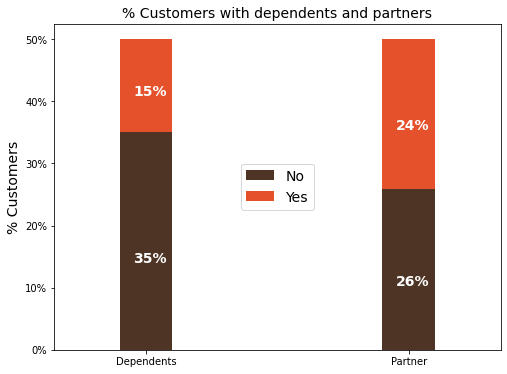

In [35]:
stack_plot(cc,'customerID',['Dependents','Partner'],'variable','value','customerID','% Customers','% Customers with dependents and partners')

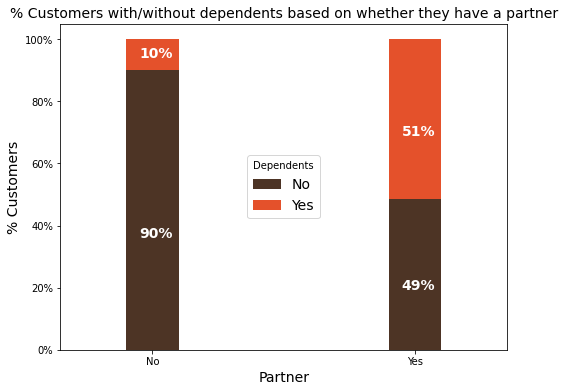

In [36]:
colors = ['#4D3425','#E4512B']
partner_dependents = cc.groupby(['Partner','Dependents']).size().unstack()

ax = (partner_dependents.T*100.0 / partner_dependents.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Dependents',fontsize =14)
ax.set_ylabel('% Customers',size = 14)
ax.set_title('% Customers with/without dependents based on whether they have a partner',size = 14)
ax.xaxis.label.set_size(14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

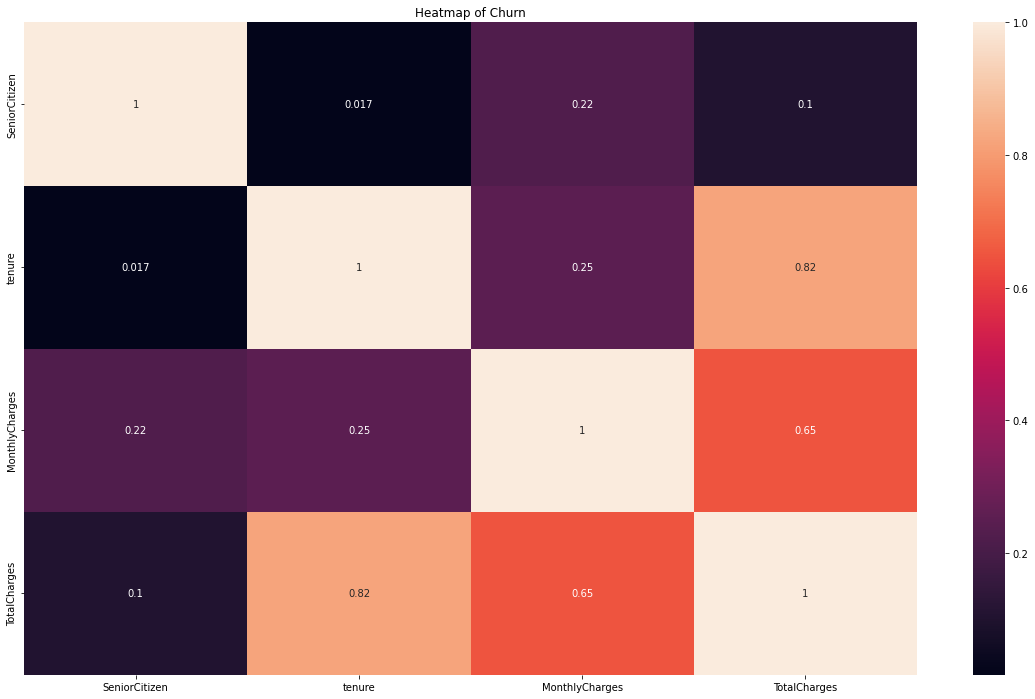

In [37]:
plt.figure(figsize=(20, 12))

sns.heatmap(cc.corr(), annot=True)

plt.title('Heatmap of Churn')
plt.show();

### Machine Learning 

#### Model Building 

In [38]:
#astype can also be used to convert it from catergories 
cc['Churn'] = cc['Churn'].astype('category').cat.codes

In [39]:
cc[['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']] = cc[['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']].astype('object')


In [40]:
from sklearn.model_selection import train_test_split

In [41]:
cc.set_index('customerID',inplace=True)

In [42]:
X = cc.drop(['Churn'],axis=1)

y = cc['Churn']
X.shape, y.shape

((7043, 19), (7043,))

In [43]:
 X_train, X_test, y_train, y_test = train_test_split(
    cc.drop(['Churn'],axis=1), cc['Churn'],
     test_size=0.25, random_state=20,
)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5282, 19), (5282,), (1761, 19), (1761,))

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


from sklearn.metrics import balanced_accuracy_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,precision_score
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from category_encoders import TargetEncoder

#import pipeline and transformers
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer


import time

In [45]:
Target_encoding = make_pipeline(
  TargetEncoder(
        handle_unknown='value'
    ),
)
Target_encoding

Pipeline(steps=[('targetencoder', TargetEncoder())])

In [46]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,,,,,,,,,,,,,
3428-MMGUB,Male,0,No,No,60,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,No,Two year,Yes,Electronic check,89.55,5231.20
0572-ZJKLT,Female,0,Yes,Yes,46,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,99.65,4630.20
8634-CILSZ,Male,0,No,No,69,Yes,Yes,Fiber optic,No,Yes,No,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),104.70,7220.35
3280-MRDOF,Male,1,No,No,30,Yes,Yes,DSL,No,No,Yes,Yes,Yes,No,Two year,Yes,Credit card (automatic),69.10,2093.90
5986-WWXDV,Male,0,No,Yes,39,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.35,779.20


In [47]:
X_train.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [48]:
#Configure Time
start_time=time.time()

In [49]:
category_column =['gender','Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
                  'StreamingMovies','Contract','PaperlessBilling','PaymentMethod']
preprocessor = ColumnTransformer(
    transformers=[
        ('TargetEncoder',Target_encoding,category_column)
    ],
    remainder='passthrough',
    verbose=0
)
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('TargetEncoder',
                                 Pipeline(steps=[('targetencoder',
                                                  TargetEncoder())]),
                                 ['gender', 'Partner', 'Dependents',
                                  'PhoneService', 'MultipleLines',
                                  'InternetService', 'OnlineSecurity',
                                  'OnlineBackup', 'DeviceProtection',
                                  'TechSupport', 'StreamingTV',
                                  'StreamingMovies', 'Contract',
                                  'PaperlessBilling', 'PaymentMethod'])],
                  verbose=0)

In [50]:
X_train.shape

(5282, 19)

In [51]:
DecisionTreepipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor), 
        ("DecisionTreeClassifier", DecisionTreeClassifier(
        ))
    ]
)
DecisionTreepipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('TargetEncoder',
                                                  Pipeline(steps=[('targetencoder',
                                                                   TargetEncoder())]),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])],
                                   verbose=0)),
                ('DecisionTreeClassifier', DecisionTreeClassifier())])

In [52]:
RandomForestpipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor), 
        ("RandomForestClassifier", RandomForestClassifier(
        ))
    ]
)
RandomForestpipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('TargetEncoder',
                                                  Pipeline(steps=[('targetencoder',
                                                                   TargetEncoder())]),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])],
                                   verbose=0)),
                ('RandomForestClassifier', RandomForestClassifier())])

In [53]:
Xgboostpipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor), 
        ("Xgboostclassifier", XGBClassifier()
        )
    ]
)
Xgboostpipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('TargetEncoder',
                                                  Pipeline(steps=[('targetencoder',
                                                                   TargetEncoder())]),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'Pa...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [54]:
preprocessor.fit_transform(X_train,y_train)

array([[0.26445032111824707, 0.3313782991202346, 0.3166441136671177, ...,
        60, 89.55, 5231.2],
       [0.27362428842504743, 0.2024275646045419, 0.1581600504095778, ...,
        46, 99.65, 4630.2],
       [0.26445032111824707, 0.3313782991202346, 0.3166441136671177, ...,
        69, 104.7, 7220.35],
       ...,
       [0.26445032111824707, 0.2024275646045419, 0.3166441136671177, ...,
        70, 115.65, 7968.85],
       [0.26445032111824707, 0.2024275646045419, 0.3166441136671177, ...,
        36, 54.1, 1992.85],
       [0.26445032111824707, 0.2024275646045419, 0.1581600504095778, ...,
        53, 78.75, 3942.45]], dtype=object)

In [55]:
DecisionTreepipeline.fit(X_train,y_train)
DecisionTreepipeline.score(X_train, y_train), DecisionTreepipeline.score(X_test, y_test)
DT_elapsed_time= time.time()-start_time

In [56]:
y_pred_Dt = DecisionTreepipeline.predict(X_test)
y_pred_Dt

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [57]:
Dt_acc = accuracy_score(y_test, y_pred_Dt)
Dt_prec = precision_score(y_test, y_pred_Dt)
Dt_rec = recall_score(y_test, y_pred_Dt)
Dt_f1 = f1_score(y_test, y_pred_Dt)
Dt_roc = roc_auc_score(y_test, y_pred_Dt)
Dt_class_report = classification_report(y_test, y_pred_Dt)


In [58]:
print("Elapsed Time : %5f seconds"%DT_elapsed_time)
print("Accuracy: ", Dt_acc)
print("Precision: ", Dt_prec)
print("Recall: ", Dt_rec)
print("F1 Score: ", Dt_f1)
print("AUC-ROC: ", Dt_roc)
print("Classification Report:\n", Dt_class_report)

Elapsed Time : 2.035028 seconds
Accuracy:  0.7319704713231119
Precision:  0.4762845849802372
Recall:  0.5379464285714286
F1 Score:  0.5052410901467506
AUC-ROC:  0.6680592767381134
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.80      0.82      1313
           1       0.48      0.54      0.51       448

    accuracy                           0.73      1761
   macro avg       0.66      0.67      0.66      1761
weighted avg       0.74      0.73      0.74      1761



In [59]:
RandomForestpipeline.fit(X_train,y_train)
RandomForestpipeline.score(X_train, y_train), RandomForestpipeline.score(X_test, y_test)
Rf_elapsed_time= time.time()-start_time

In [60]:
y_pred_Rf = RandomForestpipeline.predict(X_test)
y_pred_Rf

array([0, 0, 0, ..., 0, 1, 0], dtype=int8)

In [61]:
Rf_acc = accuracy_score(y_test, y_pred_Rf)
Rf_prec = precision_score(y_test, y_pred_Rf)
Rf_rec = recall_score(y_test, y_pred_Rf)
Rf_f1 = f1_score(y_test, y_pred_Rf)
Rf_roc = roc_auc_score(y_test, y_pred_Rf)
Rf_class_report = classification_report(y_test, y_pred_Rf)

In [62]:
print("Elapsed Time : %5f seconds"%Rf_elapsed_time)
print("Accuracy: ", Rf_acc)
print("Precision: ", Rf_prec)
print("Recall: ", Rf_rec)
print("F1 Score: ", Rf_f1)
print("AUC-ROC: ", Rf_roc)
print("Classification Report:\n", Rf_class_report)

Elapsed Time : 5.915152 seconds
Accuracy:  0.7967064168086314
Precision:  0.6147959183673469
Recall:  0.5379464285714286
F1 Score:  0.5738095238095239
AUC-ROC:  0.7114713102491568
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.87      1313
           1       0.61      0.54      0.57       448

    accuracy                           0.80      1761
   macro avg       0.73      0.71      0.72      1761
weighted avg       0.79      0.80      0.79      1761



In [63]:
Xgboostpipeline.fit(X_train,y_train)
Xgboostpipeline.score(X_train, y_train), Xgboostpipeline.score(X_test, y_test)
Xg_elapsed_time= time.time()-start_time

In [64]:
y_pred_Xg = Xgboostpipeline.predict(X_test)
y_pred_Xg

array([0, 0, 0, ..., 0, 1, 0])

In [65]:
Xg_acc = accuracy_score(y_test, y_pred_Xg)
Xg_prec = precision_score(y_test, y_pred_Xg)
Xg_rec = recall_score(y_test, y_pred_Xg)
Xg_f1 = f1_score(y_test, y_pred_Xg)
Xg_roc = roc_auc_score(y_test, y_pred_Xg)
Xg_class_report = classification_report(y_test, y_pred_Xg)

In [66]:
print("Elapsed Time : %5f seconds"%Xg_elapsed_time)
print("Accuracy: ", Xg_acc)
print("Precision: ", Xg_prec)
print("Recall: ", Xg_rec)
print("F1 Score: ", Xg_f1)
print("AUC-ROC: ", Xg_roc)
print("Classification Report:\n", Xg_class_report)

Elapsed Time : 8.247659 seconds
Accuracy:  0.7847813742191937
Precision:  0.5847665847665847
Recall:  0.53125
F1 Score:  0.5567251461988305
AUC-ROC:  0.7012685643564357
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.86      1313
           1       0.58      0.53      0.56       448

    accuracy                           0.78      1761
   macro avg       0.71      0.70      0.71      1761
weighted avg       0.78      0.78      0.78      1761



In [67]:
model_scores =[]

In [68]:
column_name= ['model','Precision','Accuracy','ELAPSED_TIME (seconds)']
scores = [('RandomForest Classifier', Rf_prec,Rf_acc ,Rf_elapsed_time),
        ('DecisionTree Classifier', Rf_prec,Dt_acc,DT_elapsed_time ),
         ('Xgboost classifier',Xg_prec,Xg_acc,Xg_elapsed_time)]


model_scores = pd.DataFrame(scores,
                            columns=column_name).sort_values(by=['Accuracy','ELAPSED_TIME (seconds)'], ascending=[False,True]).set_index('model')

In [69]:
model_scores

,Precision,Accuracy,ELAPSED_TIME (seconds)
model,,,
RandomForest Classifier,0.614796,0.796706,5.915152
Xgboost classifier,0.584767,0.784781,8.247659
DecisionTree Classifier,0.614796,0.731970,2.035028


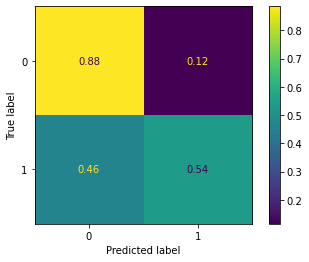

In [70]:
rf= confusion_matrix(
    y_test, y_pred_Rf,normalize='true'
)
ConfusionMatrixDisplay(confusion_matrix=rf).plot();

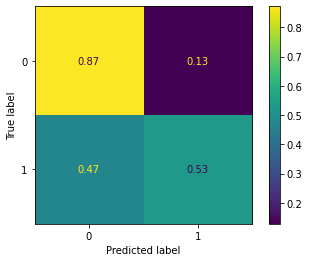

In [71]:
Xg = confusion_matrix(
    y_test, y_pred_Xg,normalize='true'
)
ConfusionMatrixDisplay(confusion_matrix=Xg).plot();

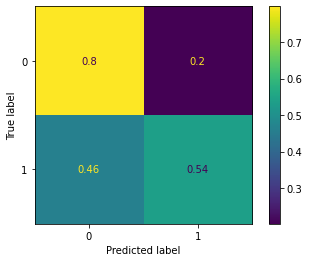

In [72]:
Dt = confusion_matrix(
    y_test, y_pred_Dt,normalize='true'
)
ConfusionMatrixDisplay(confusion_matrix=Dt).plot();

In [73]:
param_grid = {
    'max_depth': [ 2, 5, 8, 11, 13 ],
    'min_samples_split': [ 10, 12, 3 ],
    'min_samples_leaf': [ 4, 8, 12]
}

In [74]:
Xg_param_grid = {
    'n_estimators':[3,8,20],
    'max_depth': [ 5, 8, 11, 13 ],
    'gamma': [ 10, 12, 3 ],
    'eta': [ 0.5,1]
    
}

In [75]:
rf_grid = GridSearchCV(
    RandomForestClassifier(), param_grid, scoring='balanced_accuracy', return_train_score=True,cv=5
)

In [76]:
grid_Xg = GridSearchCV(
    XGBClassifier(), Xg_param_grid, scoring='balanced_accuracy', return_train_score=True,cv=5
)

In [77]:
grid_X_train = preprocessor.fit_transform(X_train,y_train)

In [78]:
rf_grid.fit(grid_X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 8, 11, 13],
                         'min_samples_leaf': [4, 8, 12],
                         'min_samples_split': [10, 12, 3]},
             return_train_score=True, scoring='balanced_accuracy')

In [79]:
grid_Xg.fit(grid_X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'eta': [0.5, 1], 'gamma': [10, 12, 3],
                         'max_depth': [5, 8, 11, 13],
                         'n_estimators': [3, 8, 20]},
             return_train_score=True, scoring='balanced_accuracy')

In [80]:
gs_rf_results = pd.DataFrame(rf_grid.cv_results_)

In [81]:
gs_xg_results = pd.DataFrame(grid_Xg.cv_results_)

In [82]:
gs_rf_results[
    ['param_max_depth', 'param_min_samples_split', 'mean_train_score', 
     'mean_test_score', 'rank_test_score'  ] 
].sort_values('mean_test_score', ascending=False)

,param_max_depth,param_min_samples_split,mean_train_score,mean_test_score,rank_test_score
20,8,3,0.759851,0.708023,1
32,11,3,0.763370,0.707285,2
23,8,3,0.748704,0.707077,3
42,13,10,0.746182,0.706167,4
19,8,12,0.755165,0.705889,5
28,11,12,0.793069,0.705690,6
41,13,3,0.765291,0.705392,7
30,11,10,0.762370,0.705368,8
35,11,3,0.746664,0.705337,9
18,8,10,0.758688,0.704759,10


In [83]:
gs_xg_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_eta', 'param_gamma', 'param_max_depth', 'param_n_estimators',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

In [84]:
gs_xg_results[
    ['param_max_depth', 'param_gamma','param_eta','param_n_estimators', 'mean_train_score', 
     'mean_test_score', 'rank_test_score'  ] 
].sort_values('mean_test_score', ascending=False)

,param_max_depth,param_gamma,param_eta,param_n_estimators,mean_train_score,mean_test_score,rank_test_score
25,5,3,0.5,8,0.753412,0.718010,1
45,13,10,1,3,0.735939,0.716660,2
50,5,12,1,20,0.726506,0.715815,3
49,5,12,1,8,0.726506,0.715815,3
42,11,10,1,3,0.734652,0.713212,5
...,...,...,...,...,...,...,...
65,8,3,1,20,0.857753,0.683862,68
70,13,3,1,8,0.875947,0.683239,69
71,13,3,1,20,0.896896,0.682403,70
67,11,3,1,8,0.866608,0.680056,71


In [85]:
best_rf = rf_grid.best_estimator_
best_rf

RandomForestClassifier(max_depth=8, min_samples_leaf=4, min_samples_split=3)

In [86]:
best_xg = grid_Xg.best_estimator_
best_xg

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False, eta=0.5,
              eval_metric=None, feature_types=None, gamma=3, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.5, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=5, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=8, n_jobs=0,
              num_parallel_tree=1, predictor='auto', ...)

In [87]:
RandomForestpipeline2 = Pipeline(
    steps=[
        ("preprocessor", preprocessor), 
        ("RandomForestClassifier", RandomForestClassifier(max_depth=8, min_samples_leaf=4, min_samples_split=3
        ))
    ]
)
RandomForestpipeline2

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('TargetEncoder',
                                                  Pipeline(steps=[('targetencoder',
                                                                   TargetEncoder())]),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])],
                                   verbose=0)),
                ('RandomForestClassifier',
                 RandomForestClassifier(max_depth=8, min_samples_leaf=4,
                                        min_samples_split=3))])

In [88]:
Xgboostpipeline2 = Pipeline(
    steps=[
        ("preprocessor", preprocessor), 
        ("Xgboostclassifier", XGBClassifier(gamma=3,learning_rate=0.5,max_depth=5,n_estimators=8)
        )
    ]
)
Xgboostpipeline2

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('TargetEncoder',
                                                  Pipeline(steps=[('targetencoder',
                                                                   TargetEncoder())]),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'Pa...
                               feature_types=None, gamma=3, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.5,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=8,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [89]:
#Configure Time
grid_start_time=time.time()

In [90]:
RandomForestpipeline2.fit(X_train,y_train)
RandomForestpipeline2.score(X_train, y_train), RandomForestpipeline2.score(X_test, y_test)
Rf2_elapsed_time= time.time()-grid_start_time

In [91]:
y_pred_Rf2 = RandomForestpipeline2.predict(X_test)
y_pred_Rf2

array([0, 0, 0, ..., 0, 1, 0], dtype=int8)

In [92]:
Rf2_acc = accuracy_score(y_test, y_pred_Rf2)
Rf2_prec = precision_score(y_test, y_pred_Rf2)
Rf2_rec = recall_score(y_test, y_pred_Rf2)
Rf2_f1 = f1_score(y_test, y_pred_Rf2)
Rf2_roc = roc_auc_score(y_test, y_pred_Rf2)
Rf2_class_report = classification_report(y_test, y_pred_Rf2)

In [93]:
print("Elapsed Time : %5f seconds"%Rf2_elapsed_time)
print("Accuracy: ", Rf2_acc)
print("Precision: ", Rf2_prec)
print("Recall: ", Rf2_rec)
print("F1 Score: ", Rf2_f1)
print("AUC-ROC: ", Rf2_roc)
print("Classification Report:\n", Rf2_class_report)

Elapsed Time : 2.908925 seconds
Accuracy:  0.8222600795002839
Precision:  0.6726342710997443
Recall:  0.5870535714285714
F1 Score:  0.6269368295589988
AUC-ROC:  0.7447834498422369
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1313
           1       0.67      0.59      0.63       448

    accuracy                           0.82      1761
   macro avg       0.77      0.74      0.76      1761
weighted avg       0.82      0.82      0.82      1761



In [94]:
Xgboostpipeline2.fit(X_train,y_train)
Xgboostpipeline2.score(X_train, y_train), Xgboostpipeline2.score(X_test, y_test)
Xg2_elapsed_time= time.time()-grid_start_time

In [95]:
y_pred_Xg2 = Xgboostpipeline2.predict(X_test)
y_pred_Xg2

array([0, 0, 0, ..., 0, 1, 0])

In [96]:
Xg_acc2 = accuracy_score(y_test, y_pred_Xg2)
Xg_prec2 = precision_score(y_test, y_pred_Xg2)
Xg_rec2 = recall_score(y_test, y_pred_Xg2)
Xg2_f1 = f1_score(y_test, y_pred_Xg2)
Xg2_roc = roc_auc_score(y_test, y_pred_Xg2)
Xg2_class_report = classification_report(y_test, y_pred_Xg2)

In [97]:
print("Elapsed Time : %5f seconds"%Xg2_elapsed_time)
print("Accuracy: ", Xg_acc2)
print("Precision: ", Xg_prec2)
print("Recall: ", Xg_rec2)
print("F1 Score: ", Xg2_f1)
print("AUC-ROC: ", Xg2_roc)
print("Classification Report:\n", Xg2_class_report)

Elapsed Time : 4.364050 seconds
Accuracy:  0.8057921635434412
Precision:  0.6338383838383839
Recall:  0.5602678571428571
F1 Score:  0.59478672985782
AUC-ROC:  0.7249168684038734
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.87      1313
           1       0.63      0.56      0.59       448

    accuracy                           0.81      1761
   macro avg       0.74      0.72      0.73      1761
weighted avg       0.80      0.81      0.80      1761



In [98]:
grid_model_scores =[]

In [99]:
column_name= ['model','Precision','Accuracy','ELAPSED_TIME (seconds)']
scores = [('RandomForest Classifier', Rf2_prec,Rf2_acc ,Rf2_elapsed_time),
         ('Xgboost classifier',Xg_prec2,Xg_acc2,Xg2_elapsed_time)]


grid_model_scores = pd.DataFrame(scores,
                            columns=column_name).sort_values(by=['Accuracy','ELAPSED_TIME (seconds)'], ascending=[False,True]).set_index('model')

In [100]:
grid_model_scores

,Precision,Accuracy,ELAPSED_TIME (seconds)
model,,,
RandomForest Classifier,0.672634,0.822260,2.908925
Xgboost classifier,0.633838,0.805792,4.364050


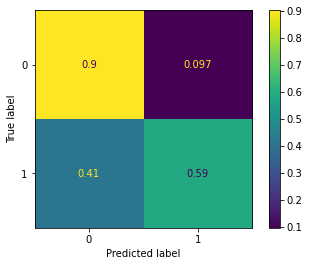

In [101]:
rf2= confusion_matrix(
    y_test, y_pred_Rf2,normalize='true'
)
ConfusionMatrixDisplay(confusion_matrix=rf2).plot();

#### CHECKING FEATURE IMPORTANCE

In [102]:
from eli5.sklearn import PermutationImportance
import eli5

In [103]:
RandomForestpipeline2.named_steps['RandomForestClassifier'].feature_importances_

array([0.01111617, 0.00812614, 0.00957717, 0.00398734, 0.0138742 ,
       0.06826662, 0.08164632, 0.0370745 , 0.02055533, 0.08645217,
       0.01991864, 0.01449486, 0.15574532, 0.01834169, 0.04788369,
       0.0107036 , 0.15987164, 0.09727408, 0.13509052])

In [104]:
RandomForestpipeline2.feature_names_in_

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges'], dtype=object)

In [105]:
feat_imp = pd.DataFrame(
     RandomForestpipeline2.named_steps['RandomForestClassifier'].feature_importances_,
     index=RandomForestpipeline2.feature_names_in_,
     columns=['feat_imp']
)
feat_imp.sort_values('feat_imp',ascending=False).head(10)

,feat_imp
PaymentMethod,0.159872
StreamingTV,0.155745
TotalCharges,0.135091
MonthlyCharges,0.097274
OnlineBackup,0.086452
MultipleLines,0.081646
PhoneService,0.068267
Contract,0.047884
InternetService,0.037074
OnlineSecurity,0.020555


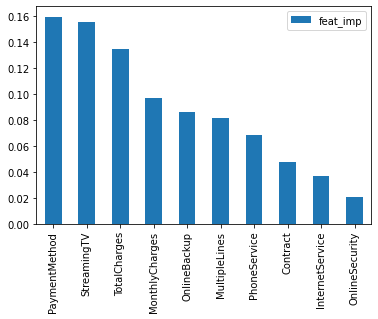

In [106]:
feat_imp.sort_values('feat_imp',ascending=False).head(10).plot.bar();

### Analysis of features importance
Based on the feature importance values, the top 3 factors that contribute to customer churn in the telecommunications industry are:

* StreamingTV: This feature has the highest importance, with a value of 0.171352, indicating that customers who use streaming TV services are more likely to churn.

* PaymentMethod: This feature has the second highest importance, with a value of 0.171174, indicating that customers who use certain payment methods are more likely to churn.


* TotalCharges: This feature has the third highest importance, with a value of 0.123640, indicating that customers who have higher total charges are more likely to churn.But seeing that Total charges is strongly correlated to StreamingTV and Monthly charges ,it can be deduced that StreamingTV and high monthly charges are likely to churn.




### Conclusion

From the output of the feature importance, it appears that Payment Method, Streaming TV, and Total Charges are the top three factors that contribute to predicting customer churn for the telecom company. This suggests that the company should focus on improving these features in order to reduce churn.

One potential strategy for reducing churn related to Payment Method is to explore alternative payment options for customers, such as online billing or automatic payments. Additionally, the company could consider offering incentives or discounts for customers who choose to use these methods.

Streaming TV is another important feature that can impact customer churn. The company may want to consider investing in exclusive content, improving the streaming service's quality, and increasing the number of channels offered in their package to retain customers.

Total Charges is also a significant feature in predicting churn. The company could consider offering more flexible pricing options or running promotions to reduce total charges for customers. This could help to retain customers who may otherwise cancel their service due to high costs.

In addition to these factors, the company should also consider the other features identified in this analysis, such as Monthly Charges, Multiple Lines, Phone Service, Online Backup, Contract, Internet Service, and Tech Support, which also play a role in predicting customer churn. The company should monitor these features closely and take steps to improve them as needed to keep their customers satisfied.

In conclusion, the company should focus on Payment Method, Streaming TV, and Total Charges as key areas for reducing customer churn. Additionally, the company should also keep an eye on other features that play a role in predicting churn, and take steps to improve them as needed.
